# Exercise Week 8:Clustering
-------------------------------------------

dataset:
https://raw.githubusercontent.com/michellechandraa/tugas/main/Property%20Dataset%20-%20Clustering.csv


Import library yang dibutuhkan

In [209]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load dataset

In [210]:
url = "https://raw.githubusercontent.com/michellechandraa/tugas/main/Property%20Dataset%20-%20Clustering.csv"
df = pd.read_csv(url, delimiter=";")
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [211]:
df.describe()

,Luas Tanah (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,306.000000,306.000000
mean,226.908795,4.276873,3.339869,1.872549
std,202.149571,1.646412,1.632311,0.531097
min,14.000000,1.000000,1.000000,1.000000
25%,96.000000,3.000000,2.000000,2.000000
50%,162.000000,4.000000,3.000000,2.000000
75%,286.000000,5.000000,4.000000,2.000000
max,1561.000000,13.000000,13.000000,4.000000


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    object 
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(4), object(8)
memory usage: 29.0+ KB


Data Preparation

1. cek apakah masih ada missing value pada data
2. lakukan label encoder
3. lakukan feature scaling pada data

In [213]:
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [214]:
null_percent = 100 * df.isnull().sum() / len(df)
null_percent

Area Category                     0.324675
Nama Daerah                       0.324675
Luas Tanah (m2)                   0.324675
Luas Bangunan (m2)                0.324675
Jumlah Kamar                      0.324675
Jumlah Kamar Mandi                0.649351
Tingkat/Lantai                    0.649351
Harga Penawaran (dari Owner)      0.324675
Terjual/Belum                     0.324675
Arah Hadap Rumah                 26.948052
Posisi Rumah                     37.662338
Lebar Jalan Depan Rumah (ROW)    13.636364
dtype: float64

[michan] Karena terlalu banyak null nya tetapi tidak sampai 50%, jadi lebih baik diisi saja menggunakan SimpleImputer

In [215]:
from sklearn.impute import SimpleImputer

# strategy menggunakan mean
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [216]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

[michan] drop column 'Nama Daerah' karena berbeda-beda semua

In [217]:
df.drop(columns=['Nama Daerah'], inplace=True)
df.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [218]:
from sklearn.preprocessing import LabelEncoder

#Label Encoder
le = LabelEncoder()
df["Arah Hadap Rumah"] = le.fit_transform(df["Arah Hadap Rumah"])
df["Posisi Rumah"] = le.fit_transform(df["Posisi Rumah"])

#Map
area_category_map = {'Below Standard': 4, 'Standard': 3, 'Premium': 2, 'Sangat Premium': 1}
df['Area Category'] = df['Area Category'].map(area_category_map)

terjual_belum_map = {'Terjual': 0, 'Belum': 1}
df['Terjual/Belum'] = df['Terjual/Belum'].map(terjual_belum_map)

lebar_jalan_map = {'< 1 Mobil':1, '1-2 Mobil':2, '> 2 Mobil':3}
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(lebar_jalan_map)

df.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600,5.0,5.0,2.0,5000000000,1,0,2,2


[Michan] cek data type

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  308 non-null    int64  
 1   Luas Tanah (m2)                308 non-null    float64
 2   Luas Bangunan (m2)             308 non-null    object 
 3   Jumlah Kamar                   308 non-null    float64
 4   Jumlah Kamar Mandi             308 non-null    float64
 5   Tingkat/Lantai                 308 non-null    float64
 6   Harga Penawaran (dari Owner)   308 non-null    object 
 7   Terjual/Belum                  308 non-null    int64  
 8   Arah Hadap Rumah               308 non-null    int64  
 9   Posisi Rumah                   308 non-null    int64  
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 26.6+ KB


[Michan] Replace data yang tidak benar atau yang masih salah

In [220]:
df["Luas Bangunan (m2)"] = df["Luas Bangunan (m2)"].str.replace(".", "," )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [221]:
df["Luas Bangunan (m2)"] = df["Luas Bangunan (m2)"].str.replace("4 98", "498" )

In [222]:
df["Harga Penawaran (dari Owner)"] = df["Harga Penawaran (dari Owner)"].str.replace(" ", "10500000000" )
df["Harga Penawaran (dari Owner)"] = df["Harga Penawaran (dari Owner)"].str.replace("10.500.000.000,00", "10500000000" )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


[michan] ubah float to int dan object to int

In [223]:
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(int)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype(str).astype(int)
df['Jumlah Kamar'] = df['Jumlah Kamar'].astype(int)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype(int)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype(int)
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].astype(int)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


In [225]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df), columns=["Area Category", "Luas Tanah (m2)", "Luas Bangunan (m2)", 
                                                  "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai ", "Harga Penawaran (dari Owner)", 
                                                  "Terjual/Belum", "Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"])
df2.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.239543,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.239543,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.239543,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.239543,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.239543,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Dengan elbow method, tentukan jumlah cluster yang ingin dibentuk

Gunakan range elbow range(1, 11)

In [226]:
from sklearn.cluster import KMeans

# set the parameter for evaluating K
X = df2[["Area Category", "Luas Tanah (m2)", "Luas Bangunan (m2)", 
         "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai ", "Harga Penawaran (dari Owner)", 
         "Terjual/Belum", "Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"]]
wcss=[]
# check the inertia for each K
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = "random", random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

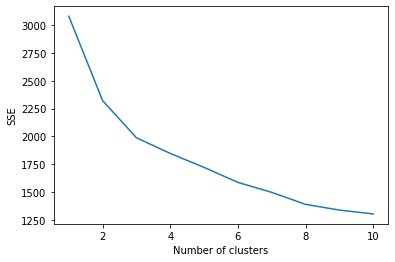

In [227]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 
plt.show()

In [228]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 3


Training model K-Means pada dataset dengan jumlah cluster yang Anda tentukan

In [229]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=4, max_iter=300, random_state=42)
model = kmeans.fit_predict(df2)

df["KMeans"] = model

Tampilkan dalam bentuk dataframe kesimpulan dari cluster:

1. kolom bertipe categorical: modus (gunakan pd.Series.mode untuk mencari modus, untuk menggunakan attribute ini tidak perlu pakai " ")
2. kolom bertipe continous : mean
3. Hasil cluster: count

In [230]:
df.groupby("KMeans")["Area Category", "Terjual/Belum", "Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"].agg(pd.Series.mode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
KMeans,,,,,
0,2,1,3,2,2
1,3,1,3,2,2
2,1,1,3,2,3
3,2,1,3,3,2


In [231]:
df.groupby("KMeans")["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai ", 
                     "Harga Penawaran (dari Owner)"].agg(pd.Series.mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
KMeans,,,,,,
0,188.049296,245.929577,4.626761,3.725352,2.042254,3.586437e+09
1,119.217822,117.970297,2.782178,1.831683,1.534653,1.501881e+09
2,597.977778,660.400000,6.288889,5.244444,1.977778,1.758144e+10
3,212.400000,279.250000,4.800000,3.900000,2.150000,4.613789e+09


In [232]:
df.groupby("KMeans")["KMeans"].agg(pd.Series.count)

KMeans
0    142
1    101
2     45
3     20
Name: KMeans, dtype: int64

## Hierarchical Clustering
Hierarchical clustering ini menggunakan metode agglomerative.

Plot Dendrogram untuk membantu menentukan jumlah cluster, gunakan max method.

<function matplotlib.pyplot.show(*args, **kw)>

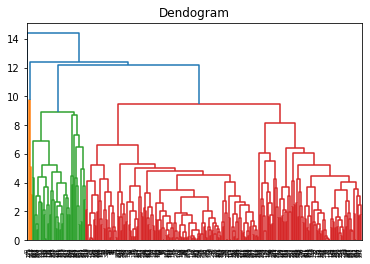

In [233]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dist_matrix = sch.linkage(df2, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

Lakukan hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans

In [234]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
model2 = agglo.fit_predict(df2)

df["agglo"] = model2

Tampilkan dalam bentuk dataframe kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas

In [235]:
df.groupby("agglo")["Area Category", "Terjual/Belum", "Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"].agg(pd.Series.mode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
agglo,,,,,
0,3,1,3,2,2
1,2,1,3,2,2
2,2,1,1,2,3
3,2,1,3,3,"[2, 3]"


In [236]:
df.groupby("agglo")["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai ", 
                     "Harga Penawaran (dari Owner)"].agg(pd.Series.mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
agglo,,,,,,
0,141.099174,144.793388,3.214876,2.239669,1.553719,2.107950e+09
1,563.860000,630.340000,6.120000,5.180000,1.980000,1.601000e+10
2,175.546218,238.983193,4.537815,3.596639,2.126050,3.466951e+09
3,208.055556,259.111111,4.555556,3.888889,2.055556,4.237543e+09


In [237]:
df.groupby("agglo")["agglo"].agg(pd.Series.count)

agglo
0    121
1     50
2    119
3     18
Name: agglo, dtype: int64

# [Michan] Hierarchical Visualization

[Michan] Single Linkage

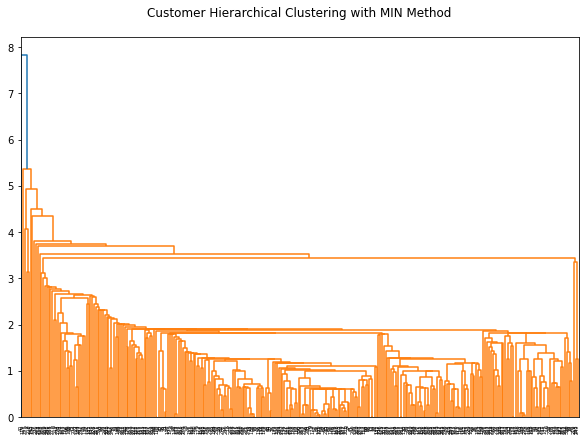

In [238]:
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MIN Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df2, method="single"))

[Michan] complete linkage

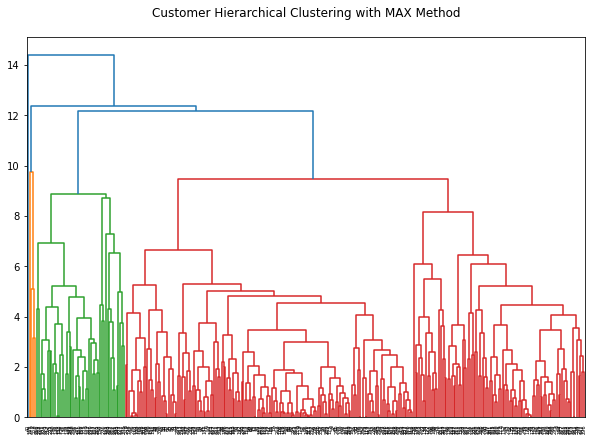

In [240]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MAX Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df2, method="complete"))

[Michan] average linkage

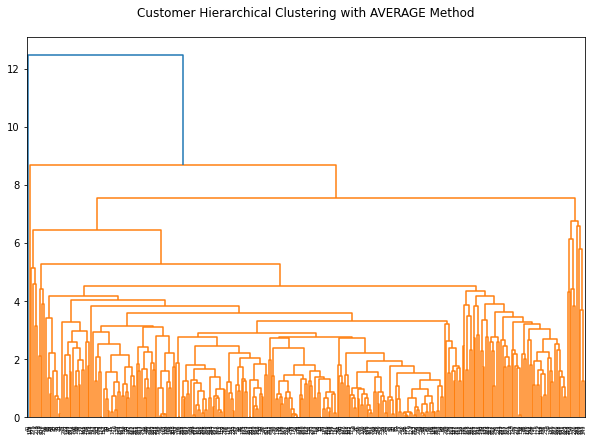

In [242]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with AVERAGE Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df2, method="average"))

[Michan] ward linkage

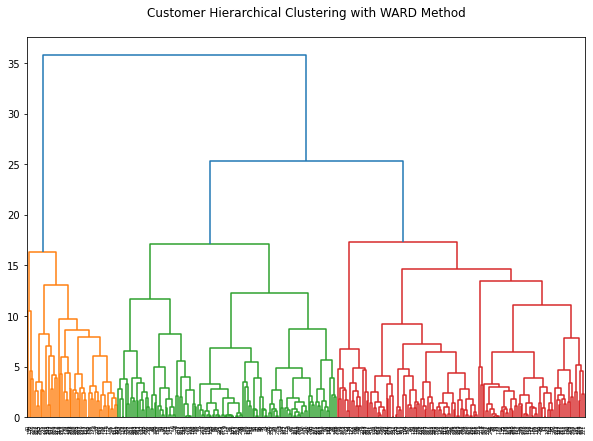

In [244]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with WARD Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df2, method="ward"))